In [0]:
import pandas as pd
import numpy as np
import json

In [0]:

import json
import numpy as np

data=[]
with open("face-annotations.json", "r") as read_file:
    data = json.load(read_file)
    
X = []

imgd = data['_via_img_metadata']#'img_001.jpg48539']['regions']

for _, imgval in imgd.items():
    for rgnd in imgval['regions']:
        shape = rgnd['shape_attributes']
        X.append([shape['width'], shape['height']])

X = np.reshape(X, (-1, 2))
X = X/400
lX = np.log(X)

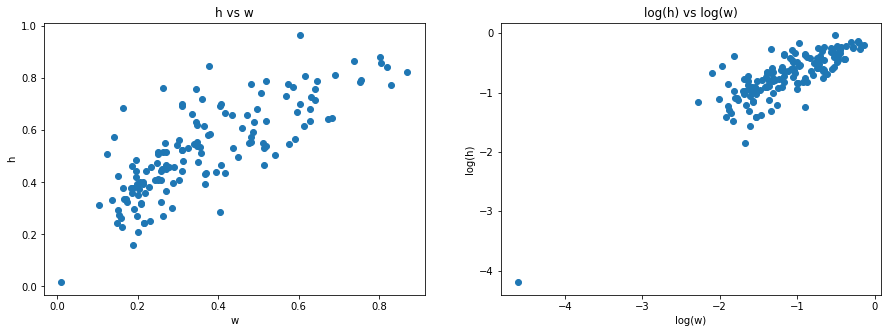

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(X[:, 0], X[:, 1], 'o')
axs[0].set_title('h vs w')
axs[0].set_ylabel('h')
axs[0].set_xlabel('w')

axs[1].plot(lX[:, 0], lX[:, 1], 'o')
axs[1].set_title('log(h) vs log(w)')
axs[1].set_ylabel('log(h)')
axs[1].set_xlabel('log(w)')
plt.show()


In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001).fit(X)
lkmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001).fit(lX)

y_pred, ly_pred = kmeans.predict(X), lkmeans.predict(lX)



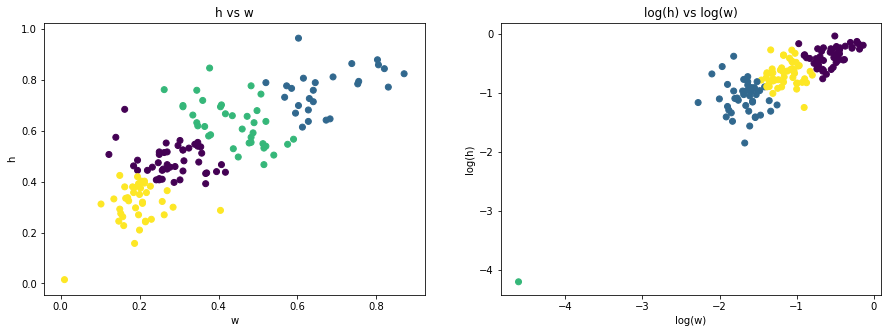

In [0]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0].set_title('h vs w')
axs[0].set_ylabel('h')
axs[0].set_xlabel('w')

axs[1].scatter(lX[:, 0], lX[:, 1], c=ly_pred)
axs[1].set_title('log(h) vs log(w)')
axs[1].set_ylabel('log(h)')
axs[1].set_xlabel('log(w)')
plt.show()

In [0]:
kmeans.cluster_centers_*400

array([[113.82222222, 192.95555556],
       [269.23076923, 305.65384615],
       [175.47222222, 251.75      ],
       [ 77.925     , 126.1       ]])

In [0]:
bb = np.exp(lkmeans.cluster_centers_)*400
print(bb)

[[229.2714671  275.19010368]
 [ 74.7405947  136.76903413]
 [  4.           6.        ]
 [126.18260617 201.74423285]]
